FORWARD PROPOGATION

In [103]:
import numpy as np
import scipy.linalg as sla
import numpy.linalg as nla
from scipy.linalg import null_space
import matplotlib.pyplot as plt

Input Layer- Linear transformation
FEATURE SELECTION -COLUMN TYPE- Supported by Keras
Each row in the matrix is treated as a sample
Each column in the matrix is treated as a feature
We consider 1 image at a time. 
Each sample forms a basis in R10

In [47]:
A=np.array([[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,25,67,210,12,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,10,100,50,80,90,150,0,0],[5,0,0,110,0,246,143,0,130,0],[0,0,0,0,250,210,120,0,0,0],[0,0,140,30,230,0,186,0,0,0],[0,0,0,30,230,0,186,0,0,0],[0,0,10,0,20,0,1,0,0,0],[0,0,0,0,0,0,0,0,0,0]])
print(A)
print(A.shape)
print(A.ndim)

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  25  67 210  12   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0  10 100  50  80  90 150   0   0]
 [  5   0   0 110   0 246 143   0 130   0]
 [  0   0   0   0 250 210 120   0   0   0]
 [  0   0 140  30 230   0 186   0   0   0]
 [  0   0   0  30 230   0 186   0   0   0]
 [  0   0  10   0  20   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
(10, 10)
2


In [59]:
#In LA terms we would call this a vector in R100- 1D plane in R100


B=A.flatten().reshape(100,1)
B =B/255
print(B)
print(B.shape)
print(B.ndim)
#1D plane in R100

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.09803922]
 [0.2627451 ]
 [0.82352941]
 [0.04705882]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.03921569]
 [0.39215686]
 [0.19607843]
 [0.31372549]
 [0.35294118]
 [0.58823529]
 [0.        ]
 [0.        ]
 [0.01960784]
 [0.        ]
 [0.        ]
 [0.43137255]
 [0.        ]
 [0.96470588]
 [0.56078431]
 [0.        ]
 [0.50980392]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.98039216]
 [0.82352941]
 [0.47058824]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.54901961]
 [0.11764706]
 [0.90196078]
 [0.        ]
 [0.72941176]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.  

1st Hidden layer - 6 neurons (2/3 of the Input layer)
Weight-Matrix -6x100
Input Matrix- 100x1
Bias matrix - 6x1
Output Matrix - 6x1



[[0.99862859]
 [0.99957842]
 [0.99845921]
 [0.99932401]
 [0.99814213]
 [0.99877717]]


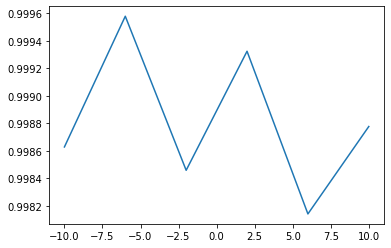

In [98]:
#HIDDEN-LAYER-1
#Matrix multiplication implemented here is essentially computing Ax=b
#b here is activation matrix of hidden layer-1 -In "LA" terms -b is the column space of Weight Matrix
#the multiplication used here is dot product- inner product
#Every row in the weight matrix is a vector transpose which is multiplied with the column vector B to get a scalar number
#The In vector is a matrix with each of those scalars
#In LA we see Ax=b but here we see Ax+c=b - the c indicates that the line essentially need not pass through the origin
#The bias is added to shift the learning curve to fit the data better and helps in complex problem solving
#We observe that there is a transformation from R100 to R6 and the weight matrix is the transformation matrix of order 6x100
#Hence we can conclude that R100 is the domain, R6 is the codomain
#N(W) gives the kernel and C(W) gives the range
#We understand two important concepts that were taught in LA that matrix multiplication transforms a vector from one space to another
#while matrix addition or scalar multiplication retains the vector in the same space and the resultant vectore is just a linear combination
#vectors.


W=np.random.random(size=(6,100)) 
bias=np.array([1,1,1,1,1,1]).reshape(6,1)

In=W.dot(B)
In1 = In + bias
A1=1/(1+np.exp(-In1))
print(A1)

g = np.linspace(-10, 10, 6) 
plt.plot(g,A1)

2nd Hidden layer - 6 neurons (2/3 of the Input layer)
Weight-Matrix -6x6
Input Matrix- 6x1
Bias matrix - 6x1
Output Matrix - 6x1



[[0.98641868]
 [0.98956715]
 [0.97690542]
 [0.93846135]
 [0.98322547]
 [0.97163375]]


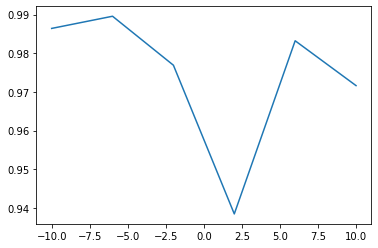

In [111]:
#2nd hidden layer
#Transformation from R6->R6
#Transformation matrix is W1

W1=np.random.random(size=(6,6)) 
bias1=np.array([1,1,1,1,1,1]).reshape(6,1)
In2=W1.dot(A1)
A2=1/(1+np.exp(-(W1.dot(A1)+bias1)))
print(A2)
g = np.linspace(-10, 10, 6) 
plt.plot(g,A2)


[[0.98303396]
 [0.96878589]]


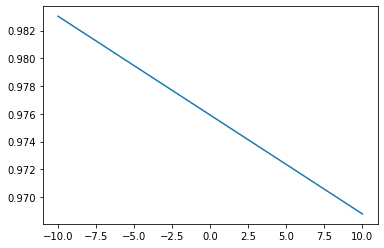

In [100]:
#output layer- binary classification problem
#output has 2 neurons
#perform one hot encoding on them
#mapping of these 6 neurons to the output layer
#Transformation from R6->R2
#Transformation matrix is W2

W2=np.random.random(size=(2,6)) 
bias2=np.array([1,1]).reshape(2,1)
output=1/(1+np.exp(-(W2.dot(A2)+bias2)))
print(output)
g = np.linspace(-10, 10, 2) 
plt.plot(g,output)
